In [1]:
import math as m
import numpy as np
from numpy import random as r
import time
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy as cp

%matplotlib inline
r.seed(int(time.time()))
route = list()

In [2]:
def func(Sc):
    x1 = Sc[0]
    x2 = Sc[1]
    return m.sqrt(x1**2+x2**2)

In [3]:
def tweak(St,p,sigma,high,low):
    for i in range(len(St)):
        if p > r.random():
            while True:
                n = r.normal(loc=0, scale=sigma)
                if (high > St[i]+n) and (low < St[i]+n):
                    St[i]+=n
                    break
    return St

In [4]:
def Quality(Sc,objective):
    func_output = func(Sc)
    if type(func_output) == list:
        error = [func_output[i]-objective[i] for i in range(len(func_output))]
    else:
        error = func_output - objective
    return 1/abs(error)

In [5]:
def simulatedAnnealing(S,y,high,low,t,p):
    Best = list()
    Best[:] = cp.deepcopy(S)
    sigma = 0.1
    global route
    route.append(Best[:])
    while True:
        print('\n\n\n')
        R = tweak(cp.deepcopy(S),p,sigma,high,low)
        print(R)
        print(S)
        Qr = Quality(R,y)
        Qs = Quality(S,y)
        try:
            P = m.e**((Qr-Qs)/t)
        except:
            pass
        print('QUALITY_R///{}'.format(Qr))
        print('QUALITY_S///{}'.format(Qs))
        print('fraction is:{}'.format(P))
        if (Qr > Qs) or (r.random() < P):
            print('NEW_S')
            S[:] = R[:]
        if t > 0.01:
            t-= t/10
        print('t = {}'.format(t))
        
        if (Quality(S,y) > Quality(Best,y)):
            print('new Best****:{}'.format(Best))
            Best[:] = S[:]
            route.append(Best[:])
            print(route)
            
        if t < 0 or Quality(Best,y) > 200:
            break
    print('the Best Quality obtained was:{}'.format(Quality(Best,y)))
    return Best

In [6]:
simulatedAnnealing(S = [9.00,4.00],y = 0,high = 10,low = -8,t =0.01,p = 0.8)





[9.047502945725558, 3.9024053730567236]
[9.0, 4.0]
QUALITY_R///0.10148959585371009
QUALITY_S///0.10153461651336192
fraction is:0.9955080531424693
NEW_S
t = 0.01




[8.798005481733506, 3.985375451831662]
[9.047502945725558, 3.9024053730567236]
QUALITY_R///0.10353491571287138
QUALITY_S///0.10148959585371009
fraction is:1.2269507003603155
NEW_S
t = 0.01
new Best****:[9.0, 4.0]
[[9.0, 4.0], [8.798005481733506, 3.985375451831662]]




[8.810343898188737, 3.9068912786374947]
[8.798005481733506, 3.985375451831662]
QUALITY_R///0.10375880592832346
QUALITY_S///0.10353491571287138
fraction is:1.022641536689127
NEW_S
t = 0.01
new Best****:[8.798005481733506, 3.985375451831662]
[[9.0, 4.0], [8.798005481733506, 3.985375451831662], [8.810343898188737, 3.9068912786374947]]




[8.78415849877267, 3.9068912786374947]
[8.810343898188737, 3.9068912786374947]
QUALITY_R///0.10401709163172893
QUALITY_S///0.10375880592832346
fraction is:1.0261650182744204
NEW_S
t = 0.01
new Best****:[8.810343898188737, 3

[-0.00266401104853638, 0.003819308161653955]

In [7]:
print(route)

[[9.0, 4.0], [8.798005481733506, 3.985375451831662], [8.810343898188737, 3.9068912786374947], [8.78415849877267, 3.9068912786374947], [8.743490542744514, 3.9563170094022984], [8.649703644048506, 4.0268354620179005], [8.649703644048506, 3.8654966044938543], [8.444409455242399, 3.7889186246540234], [8.394678551978993, 3.695246913345679], [8.394678551978993, 3.6055545369054642], [8.394678551978993, 3.593071717522474], [8.34926756476514, 3.613757374515311], [8.214601764371702, 3.3820941905609776], [8.245033871721281, 3.294192945254893], [8.094712332268344, 3.294192945254893], [7.992952571352107, 3.3657642831718864], [7.993420349098464, 3.342113190341529], [7.993420349098464, 3.298585769988641], [7.874277977486796, 3.135214519287545], [7.865452379110922, 3.135214519287545], [7.822666959862244, 3.1362280950164254], [7.822666959862244, 2.9894971527041436], [7.644143930786412, 2.9926759841564436], [7.644143930786412, 2.8696219654048143], [7.564712928389627, 2.8871911937716375], [7.622551406912

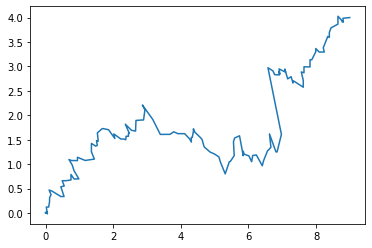

In [8]:
h1 = [i[0] for i in route]
h2 = [i[1] for i in route]
plt.plot(h1,h2)
plt.show()

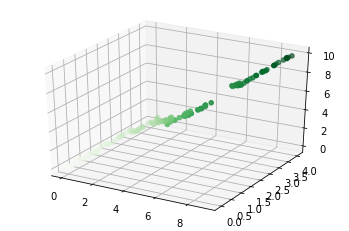

In [9]:
h3 = [func(s) for s in route]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(h1, h2, h3, c=h3, cmap='Greens');
plt.show()